### Required Packages

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as plt
import seaborn as sns
import scipy.stats as stats

### 1.	Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
data = pd.read_csv('C:/Users/Nithin/Downloads/Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')
claim = pd.read_csv('C:/Users/Nithin/Downloads/Python Foundation Case Study 3 - Insurance Claims Case Study/claims.csv')

In [3]:
cust_data = pd.merge(left=data,right=claim,how = 'inner',left_on='CUST_ID',right_on='customer_id')
cust_data.drop(columns='customer_id',inplace=True)

### 2.	Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [4]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   incident_cause       1085 non-null   object 
 8   claim_date           1085 non-null   object 
 9   claim_area           1085 non-null   object 
 10  police_report        1085 non-null   object 
 11  claim_type           1085 non-null   object 
 12  claim_amount         1020 non-null   object 
 13  total_policy_claims  1075 non-null   float64
 14  fraudulent           1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [5]:
cust_data.describe()

,CUST_ID,claim_id,total_policy_claims
count,1.085000e+03,1.085000e+03,1075.000000
mean,5.076790e+07,4.891553e+07,1.586977
std,2.849625e+07,2.912818e+07,1.146859
min,1.545570e+05,2.683200e+04,1.000000
25%,2.645062e+07,2.404606e+07,1.000000
50%,4.975949e+07,4.855975e+07,1.000000
75%,7.609396e+07,7.404400e+07,2.000000
max,9.996199e+07,9.977548e+07,8.000000


### 3.	Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [6]:
cust_data['claim_amount'] = cust_data.claim_amount.str.replace('$','').astype('float')

C:\Users\Nithin\AppData\Local\Temp/ipykernel_17456/174342303.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_data['claim_amount'] = cust_data.claim_amount.str.replace('$','').astype('float')


### 4.	Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [7]:
cust_data['Flag'] = np.where(cust_data.police_report.isin(['No','Unknown']),0,1)

### 5.	One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.

##### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.


In [8]:
cust_data.drop_duplicates(subset='CUST_ID',keep='last',inplace=True)

### 6.	Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [9]:
cust_data.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
Flag                    0
dtype: int64

In [10]:
cust_data.claim_amount.fillna(cust_data.claim_amount.mean(),inplace=True)
cust_data.total_policy_claims.fillna(cust_data.total_policy_claims.mode(),inplace= True)

### 7.	Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
##### Children	< 18
##### Youth	18-30
##### Adult	30-60
##### Senior	> 60

In [11]:
cust_data.DateOfBirth = pd.to_datetime(cust_data.DateOfBirth)
cust_data.claim_date = pd.to_datetime(cust_data.claim_date)

In [12]:
yr = (max(cust_data.claim_date.dt.year)-cust_data.DateOfBirth.dt.year)
crt_yr = (max(cust_data.claim_date.dt.year)-(cust_data.DateOfBirth.dt.year-100))

In [13]:
cust_data['Age'] = np.where(cust_data.DateOfBirth > cust_data.claim_date,crt_yr,yr)

In [18]:
cust_data['Age_cat'] = np.where(cust_data.Age <= 30,'Youth',np.where(cust_data.Age <= 60,'Adult',np.where(cust_data.Age > 60,'Senior',0)))

### 8.	What is the average amount claimed by the customers from various segments?

In [14]:
cust_data.groupby('Segment').claim_amount.mean()

Segment
Gold        12846.386178
Platinum    12371.644999
Silver      12267.146560
Name: claim_amount, dtype: float64

### 9.	What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [15]:
lc = pd.to_datetime('2018/10/01') - pd.DateOffset(days = 20)
uc = pd.to_datetime('2018/10/01')

In [16]:
cust_data[(cust_data.claim_date>= lc) & (cust_data.claim_date <= uc)].claim_amount.sum()

324746.4792694965

### 10.	How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [19]:
cust_data.loc[cust_data.State.isin(['TX','DE','AK']) & cust_data.incident_cause.isin(['Driver error','Other driver error'])].groupby('Age_cat')['CUST_ID'].count().head(1)

Age_cat
Adult    24
Name: CUST_ID, dtype: int64

### 11.	Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [20]:
df = pd.pivot_table(cust_data,index ='Segment',columns ='gender',values ='claim_amount')

array([<AxesSubplot:ylabel='Female'>, <AxesSubplot:ylabel='Male'>],
      dtype=object)

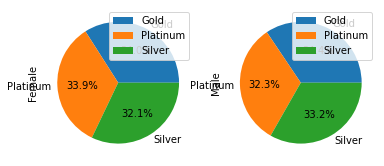

In [21]:
df.plot(kind = 'pie',labels = df.index,autopct='%.1f%%',subplots = True)

### 12.	Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [22]:
df2 = cust_data.loc[cust_data.incident_cause.isin(['Driver error','Other driver error']),['gender','incident_cause']]

<AxesSubplot:xlabel='gender'>

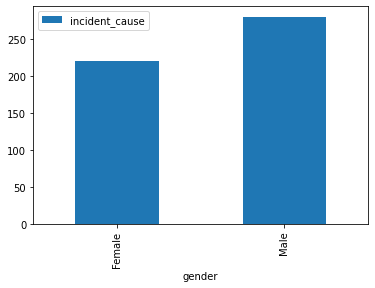

In [23]:
df2.groupby('gender').count().plot(kind = 'bar')

### 13.	Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [24]:
df3 = cust_data.loc[cust_data.fraudulent == 'Yes',['Age_cat','fraudulent']]

<AxesSubplot:xlabel='Age_cat'>

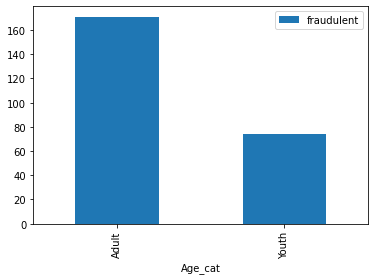

In [25]:
df3.groupby('Age_cat').count().plot(kind = 'bar')

### 14.	Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [26]:
df4 = cust_data
df4['claim_mnth'] = cust_data.claim_date.dt.month

<AxesSubplot:xlabel='claim_mnth'>

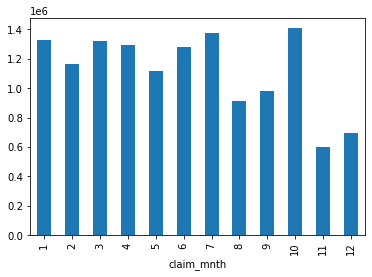

In [27]:
df4.groupby('claim_mnth').claim_amount.sum().plot(kind='bar')

### 15.	What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [28]:
df5 = cust_data.loc[:,['gender','claim_amount','fraudulent','Age_cat']]
df6 = pd.pivot_table(data=df5,index='gender',columns=['fraudulent','Age_cat'],values = 'claim_amount',aggfunc='sum')

C:\Users\Nithin\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


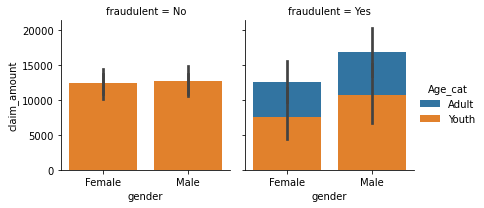

In [29]:
df7 = sns.FacetGrid(df4, col = 'fraudulent', hue = 'Age_cat')
df8 = (df7.map(sns.barplot, 'gender', 'claim_amount').add_legend())

## Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements

### 16.	Is there any similarity in the amount claimed by males and females?

In [ ]:
#Hypothesis Testing
Ho - There is similarity
Ha - There is no similarity

CI - 95%
P - 0.05

#Conc --> Ha Rejected

In [30]:
m = cust_data.loc[cust_data.gender == 'Male','claim_amount']
f = cust_data.loc[cust_data.gender == 'Female','claim_amount']

In [31]:
stats.ttest_ind(m,f)

Ttest_indResult(statistic=0.9630529881732577, pvalue=0.3357373087404285)

###### There is similarity in amounts claimed by males & females

### 17.	Is there any relationship between age category and segment?

In [ ]:
#Hypothesis Testing
H0 - No relationship
Ha - Has relationship

CI - 95%
P - 0.05

#Conc --> Ha Rejected

In [32]:
df9 = pd.crosstab(cust_data.Age_cat,cust_data.Segment)

In [33]:
stats.chi2_contingency(df9)

(0.793525436282168,
 0.6724935772286729,
 2,
 array([[255.70779221, 248.81539889, 238.47680891],
        [115.29220779, 112.18460111, 107.52319109]]))

###### There is no relationship between age category and segment

### 18.	The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [ ]:
#Hypothesis Testing
H0 - claims <= $10,000
Ha - claims > $10,000

CI - 95%
P - 0.05

#Conc --> Ho is Rejected

In [34]:
df10 = cust_data
df10['claim_yr'] = df10.claim_date.dt.year
df11 = df10[df10.claim_yr == (max(df10.claim_yr))]

In [35]:
stats.ttest_1samp(df11.claim_amount,popmean=10000)

Ttest_1sampResult(statistic=4.508441689457533, pvalue=8.205144389110108e-06)

###### There is raise in claim amount compared to FY 2016-2017 of $10,000

### 19.	Is there any difference between age groups and insurance claims?

In [ ]:
#Hypothesis Testing
H0 - No Difference
Ha - There is Difference

CI - 95%
P - 0.05

#Conc -> Ha is Rejected

In [54]:
s1 = cust_data.loc[cust_data.Age_cat == 'Adult','total_policy_claims'].dropna()
s2 = cust_data.loc[cust_data.Age_cat == 'Youth','total_policy_claims'].dropna()

In [55]:
stats.f_oneway(s1,s2)

F_onewayResult(statistic=0.11415888005675576, pvalue=0.7355246209251278)

###### There is no difference between age groups & insurance claims

### 20.	Is there any relationship between total number of policy claims and the claimed amount?

In [ ]:
#Hypothesis Testing
H0 - There is Relationship
Ha - No Relationship

CI - 95%
P - 0.05

#Conc -> Ha is Rejected

In [70]:
s3  = cust_data.loc[cust_data.total_policy_claims == 1,'claim_amount'].dropna()
s4  = cust_data.loc[cust_data.total_policy_claims == 2,'claim_amount'].dropna()
s5  = cust_data.loc[cust_data.total_policy_claims == 3,'claim_amount'].dropna()
s6  = cust_data.loc[cust_data.total_policy_claims == 4,'claim_amount'].dropna()
s7  = cust_data.loc[cust_data.total_policy_claims == 5,'claim_amount'].dropna()
s8  = cust_data.loc[cust_data.total_policy_claims == 6,'claim_amount'].dropna()
s9  = cust_data.loc[cust_data.total_policy_claims == 7,'claim_amount'].dropna()
s10 = cust_data.loc[cust_data.total_policy_claims == 8,'claim_amount'].dropna()

In [72]:
stats.f_oneway(s3,s4,s5,s6,s7,s8,s9,s10)

F_onewayResult(statistic=0.8389022172243692, pvalue=0.555019560496218)

###### There is relationship between total policy claims & claim amount